# 导入必要库

In [1]:
import gc

from core import RLEnv
from core.agent import BaseAgent
from greedy import (
    EpsilonDecreasingConfig,
    GreedyAgent,
    greedy_average,
    epsilon_average,
    epsilon_decreasing_average,
)
from ucb1 import UCBAgent, ucb1

In [2]:
from pathlib import Path


SEED: int = 42
MACHINE_COUNT: int = 100
COUNT: int = 50
STEPS: int = 10_000
CONVERGENCE_THRESHOLD: float = 0.9
CONVERGENCE_MIN_STEPS: int = 1000
OPTIMISTIC_TIMES: int = 1
ENABLE_OPTIMISTIC: bool = True
EXPERIMENT_DATA_DIR: Path = Path.cwd() / "experiment_data"

ENV: RLEnv = RLEnv(machine_count=MACHINE_COUNT, seed=SEED)
EPSILON_CONFIG: EpsilonDecreasingConfig = EpsilonDecreasingConfig()

In [3]:
from train import batch_train
from utils.plot import plot_metrics_history

# Agent 创建函数

In [4]:
def create_greedy_agent(
    env: RLEnv, 
    epsilon_config: EpsilonDecreasingConfig, 
    optimistic_init: bool, 
    optimistic_times: int,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return GreedyAgent(
        name=greedy_average.__name__,
        env=env,
        greedy_algorithm=greedy_average,
        epsilon_config=epsilon_config,
        optimistic_init=optimistic_init,
        optimistic_times=optimistic_times,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

def create_epsilon_agent(
    env: RLEnv, 
    epsilon_config: EpsilonDecreasingConfig, 
    optimistic_init: bool, 
    optimistic_times: int,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return GreedyAgent(
        name=epsilon_average.__name__,
        env=env,
        greedy_algorithm=epsilon_average,
        epsilon_config=epsilon_config,
        optimistic_init=optimistic_init,
        optimistic_times=optimistic_times,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

def create_decreasing_agent(
    env: RLEnv, 
    epsilon_config: EpsilonDecreasingConfig, 
    optimistic_init: bool, 
    optimistic_times: int,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return GreedyAgent(
        name=epsilon_decreasing_average.__name__,
        env=env,
        greedy_algorithm=epsilon_decreasing_average,
        epsilon_config=epsilon_config,
        optimistic_init=optimistic_init,
        optimistic_times=optimistic_times,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

In [5]:
def create_ucb1_agent(
    env: RLEnv,
    convergence_threshold: float,
    convergence_min_steps: int,
    seed: int,
) -> BaseAgent:
    return UCBAgent(
        name=ucb1.__name__,
        env=env,
        ucb1_algorithm=ucb1,
        convergence_threshold=convergence_threshold,
        convergence_min_steps=convergence_min_steps,
        seed=seed,
    )

# 训练

## 普通贪婪算法

达到收敛时的步数: 4410
达到收敛时的步数: 5240
达到收敛时的步数: 3380
达到收敛时的步数: 2570
达到收敛时的步数: 6110
达到收敛时的步数: 3990
达到收敛时的步数: 3660
达到收敛时的步数: 2420
达到收敛时的步数: 5660
达到收敛时的步数: 2730
达到收敛时的步数: 6010
达到收敛时的步数: 2310
达到收敛时的步数: 2270
达到收敛时的步数: 2850
达到收敛时的步数: 2750
达到收敛时的步数: 4140
达到收敛时的步数: 3900
达到收敛时的步数: 2690
达到收敛时的步数: 4570
达到收敛时的步数: 1920
达到收敛时的步数: 2230
达到收敛时的步数: 3270
达到收敛时的步数: 3120
达到收敛时的步数: 2420
达到收敛时的步数: 2960
达到收敛时的步数: 5180
达到收敛时的步数: 3500
达到收敛时的步数: 2430
达到收敛时的步数: 3270
达到收敛时的步数: 3220
达到收敛时的步数: 3680
达到收敛时的步数: 3530
达到收敛时的步数: 3350
达到收敛时的步数: 2600
AverageMetrics(avg_regret=46.18019801980263, avg_regret_rate=0.004711313131313196, avg_total_reward=9755.8, avg_optimal_rate=0.6746161616161614, avg_convergence_steps=2366.8, avg_convergence_rate=0.68)
成功加载字体： /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/assets/微软雅黑.ttf


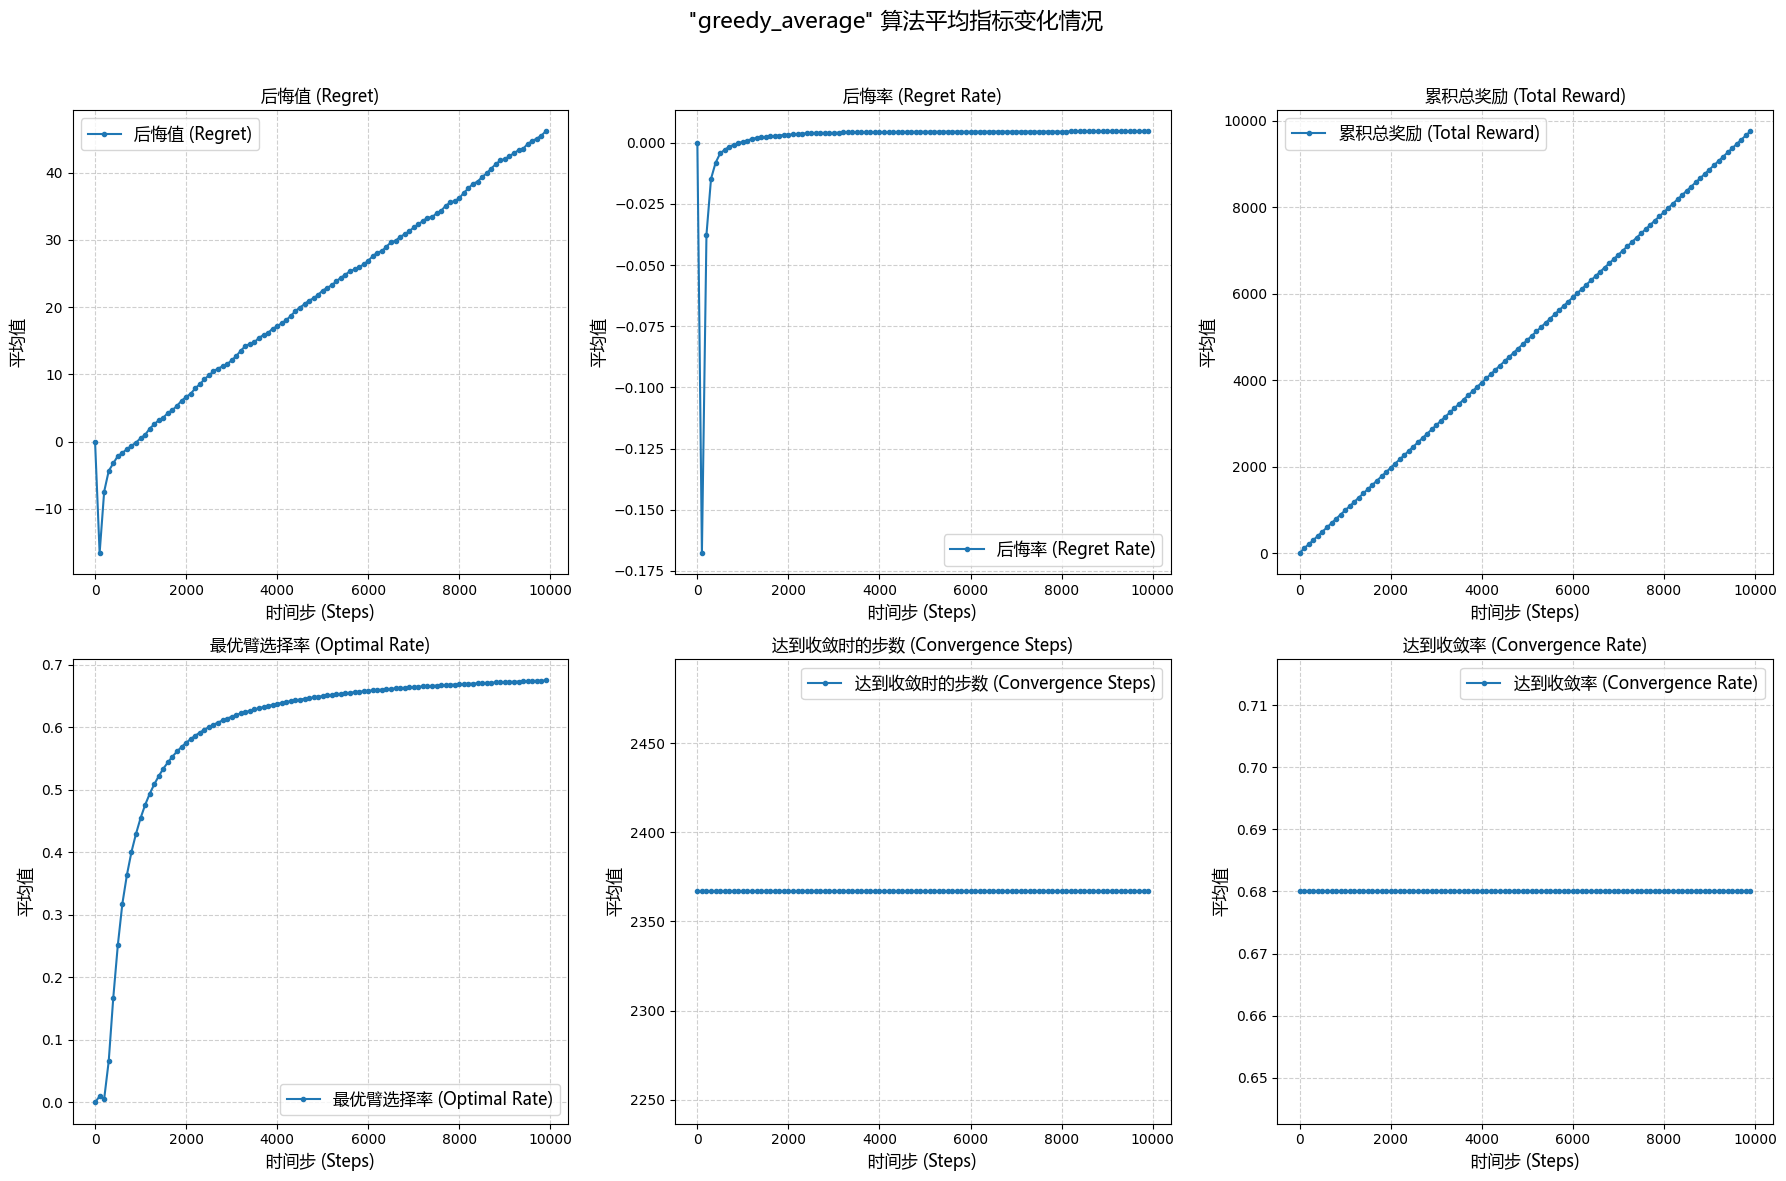

✅ 实验数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/greedy_average_Q_0=1.png


22178

In [6]:
agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_greedy_agent,
    env=ENV,
    epsilon_config=EPSILON_CONFIG,
    steps=STEPS,
    seed=SEED,
    optimistic_init=ENABLE_OPTIMISTIC,
    optimistic_times=OPTIMISTIC_TIMES,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
)
print(metrics)
plot_metrics_history(agents, greedy_average.__name__, f"{EXPERIMENT_DATA_DIR}/{greedy_average.__name__}_Q_0={OPTIMISTIC_TIMES}.png")

del agents, reward, metrics
gc.collect()

## epsilon-贪婪算法

AverageMetrics(avg_regret=516.7001980198027, avg_regret_rate=0.05271385858585865, avg_total_reward=9285.28, avg_optimal_rate=0.631840404040404, avg_convergence_steps=0.0, avg_convergence_rate=0.0)
成功加载字体： /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/assets/微软雅黑.ttf


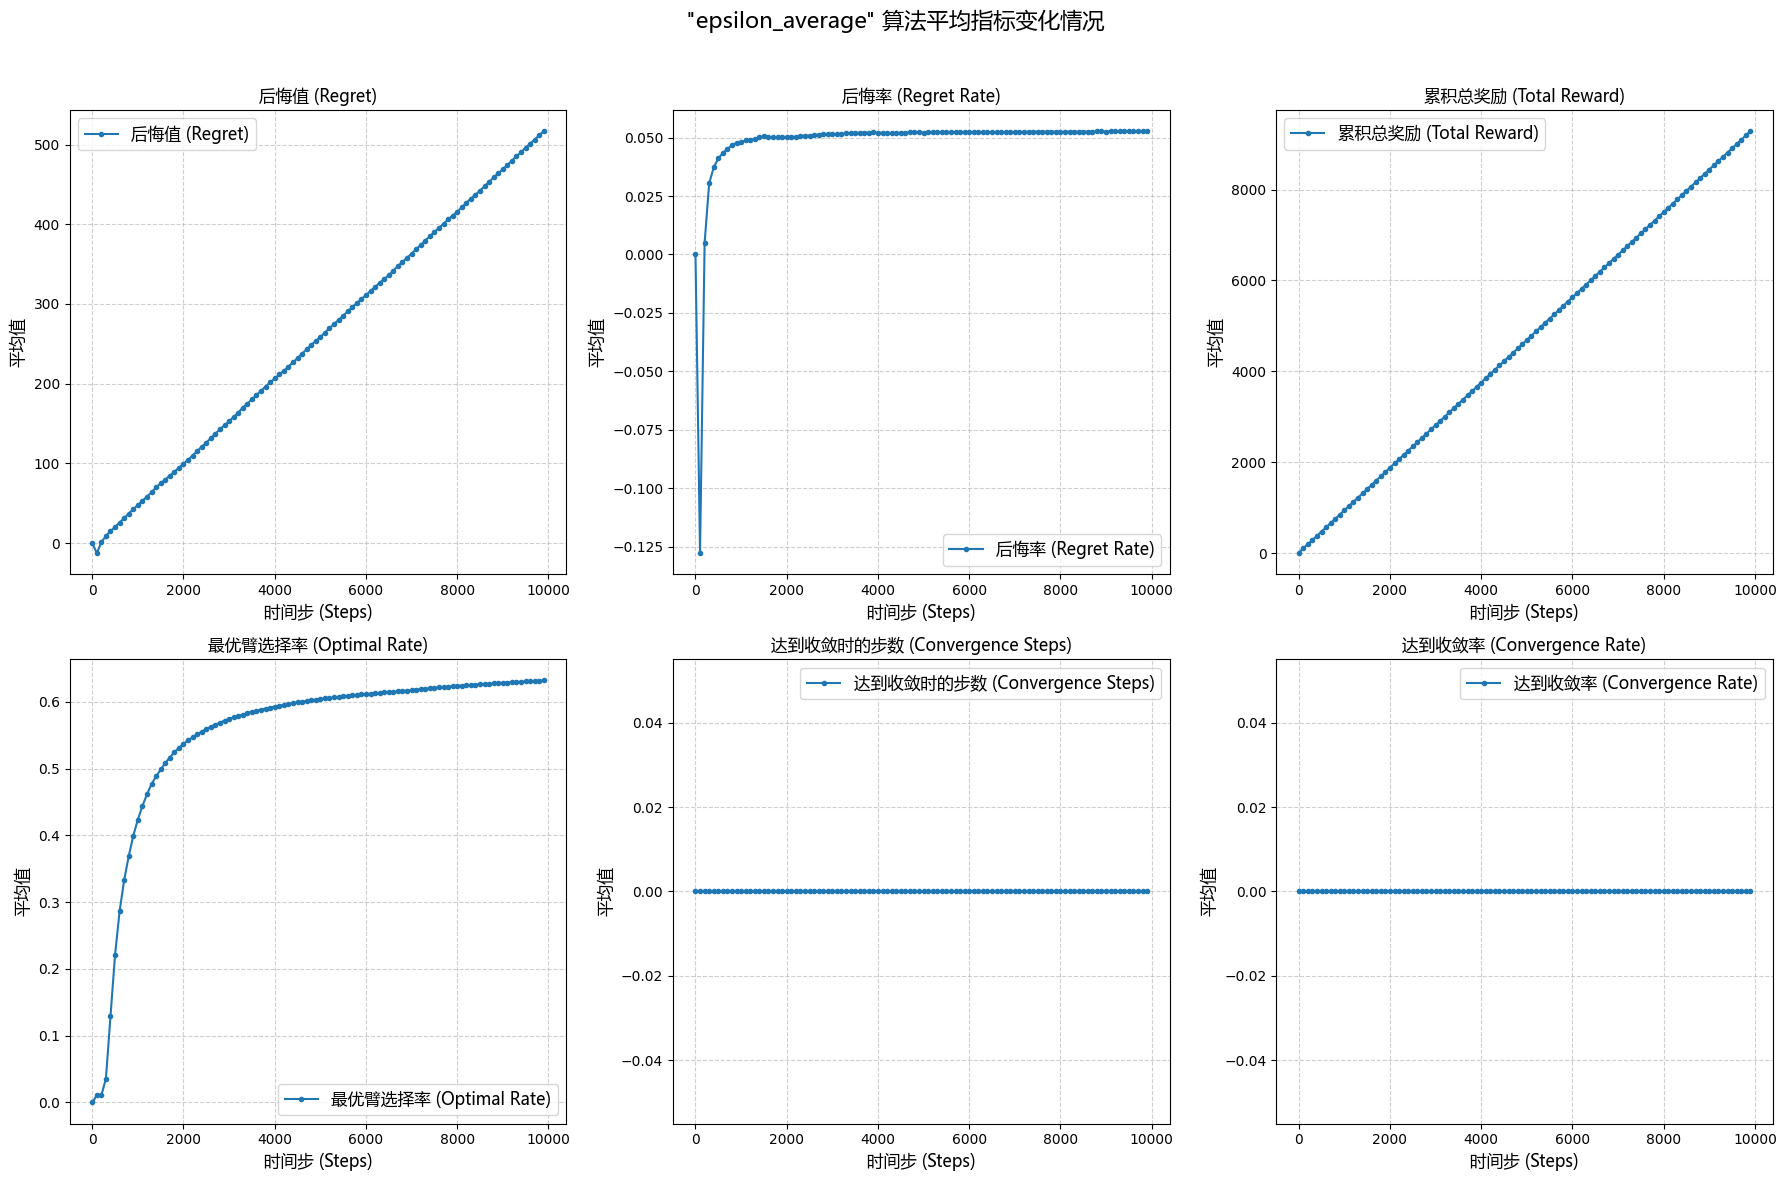

✅ 实验数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/epsilon_average_Q_0=1.png


21962

In [7]:
agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_epsilon_agent,
    env=ENV,
    epsilon_config=EPSILON_CONFIG,
    steps=STEPS,
    seed=SEED,
    optimistic_init=ENABLE_OPTIMISTIC,
    optimistic_times=OPTIMISTIC_TIMES,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
)
print(metrics)
plot_metrics_history(agents, epsilon_average.__name__, f"{EXPERIMENT_DATA_DIR}/{epsilon_average.__name__}_Q_0={OPTIMISTIC_TIMES}.png")

del agents, reward, metrics
gc.collect()

## 退火 epsilon 贪婪算法

达到收敛时的步数: 5790
达到收敛时的步数: 5120
达到收敛时的步数: 5310
达到收敛时的步数: 4710
达到收敛时的步数: 7330
达到收敛时的步数: 4500
达到收敛时的步数: 6110
达到收敛时的步数: 4830
达到收敛时的步数: 5280
达到收敛时的步数: 4640
达到收敛时的步数: 4040
达到收敛时的步数: 5860
达到收敛时的步数: 4790
达到收敛时的步数: 4660
达到收敛时的步数: 5110
达到收敛时的步数: 6110
达到收敛时的步数: 5810
达到收敛时的步数: 4020
达到收敛时的步数: 5180
达到收敛时的步数: 4830
达到收敛时的步数: 4850
达到收敛时的步数: 5640
达到收敛时的步数: 5540
达到收敛时的步数: 5230
达到收敛时的步数: 8220
达到收敛时的步数: 7430
达到收敛时的步数: 5500
达到收敛时的步数: 4030
达到收敛时的步数: 4710
达到收敛时的步数: 6420
达到收敛时的步数: 3890
达到收敛时的步数: 3990
达到收敛时的步数: 5160
达到收敛时的步数: 5240
AverageMetrics(avg_regret=169.54019801980263, avg_regret_rate=0.01729652525252532, avg_total_reward=9632.44, avg_optimal_rate=0.6767030303030305, avg_convergence_steps=3597.6, avg_convergence_rate=0.68)
成功加载字体： /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/assets/微软雅黑.ttf


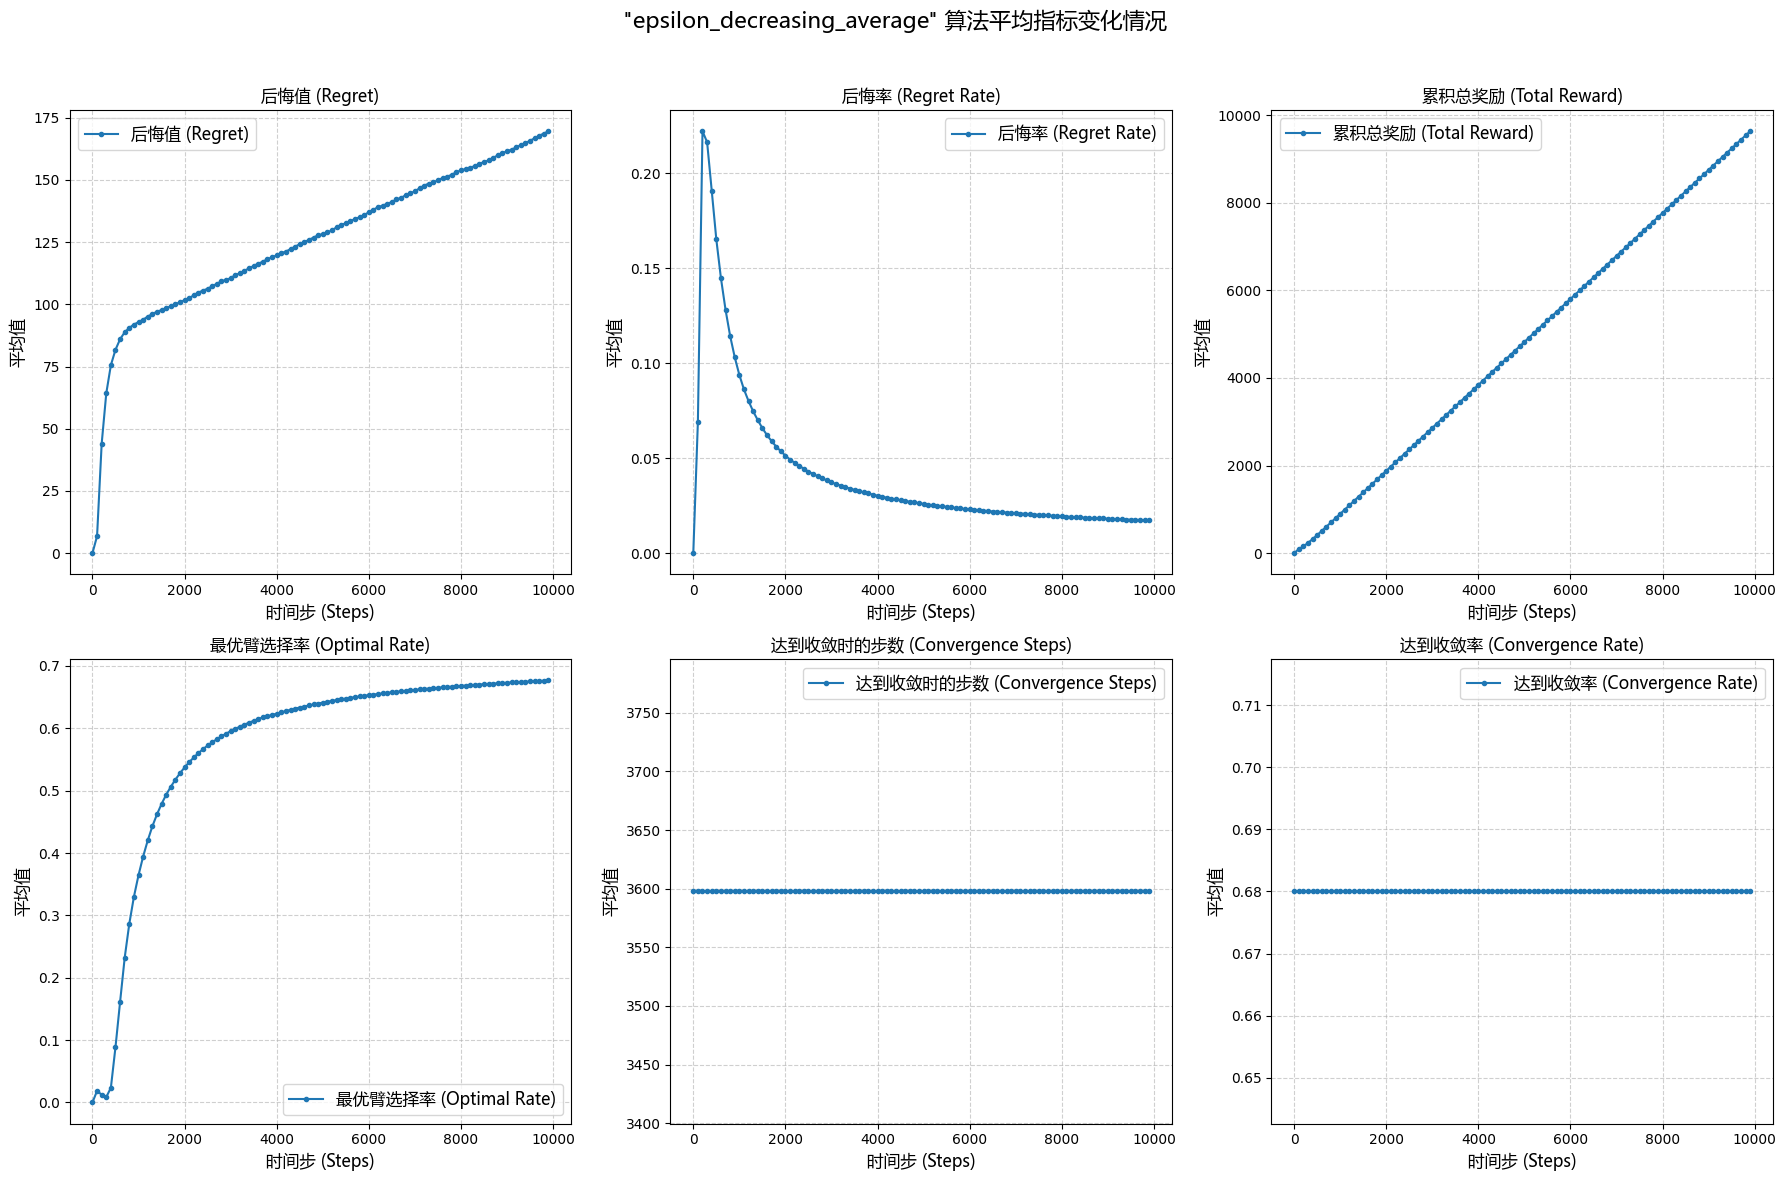

✅ 实验数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/epsilon_decreasing_average_Q_0=1.png


22590

In [8]:
agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_decreasing_agent,
    env=ENV,
    epsilon_config=EPSILON_CONFIG,
    steps=STEPS,
    seed=SEED,
    optimistic_init=ENABLE_OPTIMISTIC,
    optimistic_times=OPTIMISTIC_TIMES,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
)
print(metrics)
plot_metrics_history(agents, epsilon_decreasing_average.__name__, f"{EXPERIMENT_DATA_DIR}/{epsilon_decreasing_average.__name__}_Q_0={OPTIMISTIC_TIMES}.png")

del agents, reward, metrics
gc.collect()

## UCB1算法

AverageMetrics(avg_regret=2027.130099009899, avg_regret_rate=0.20474014000000001, avg_total_reward=7873.86, avg_optimal_rate=0.067914, avg_convergence_steps=0.0, avg_convergence_rate=0.0)
成功加载字体： /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/assets/微软雅黑.ttf


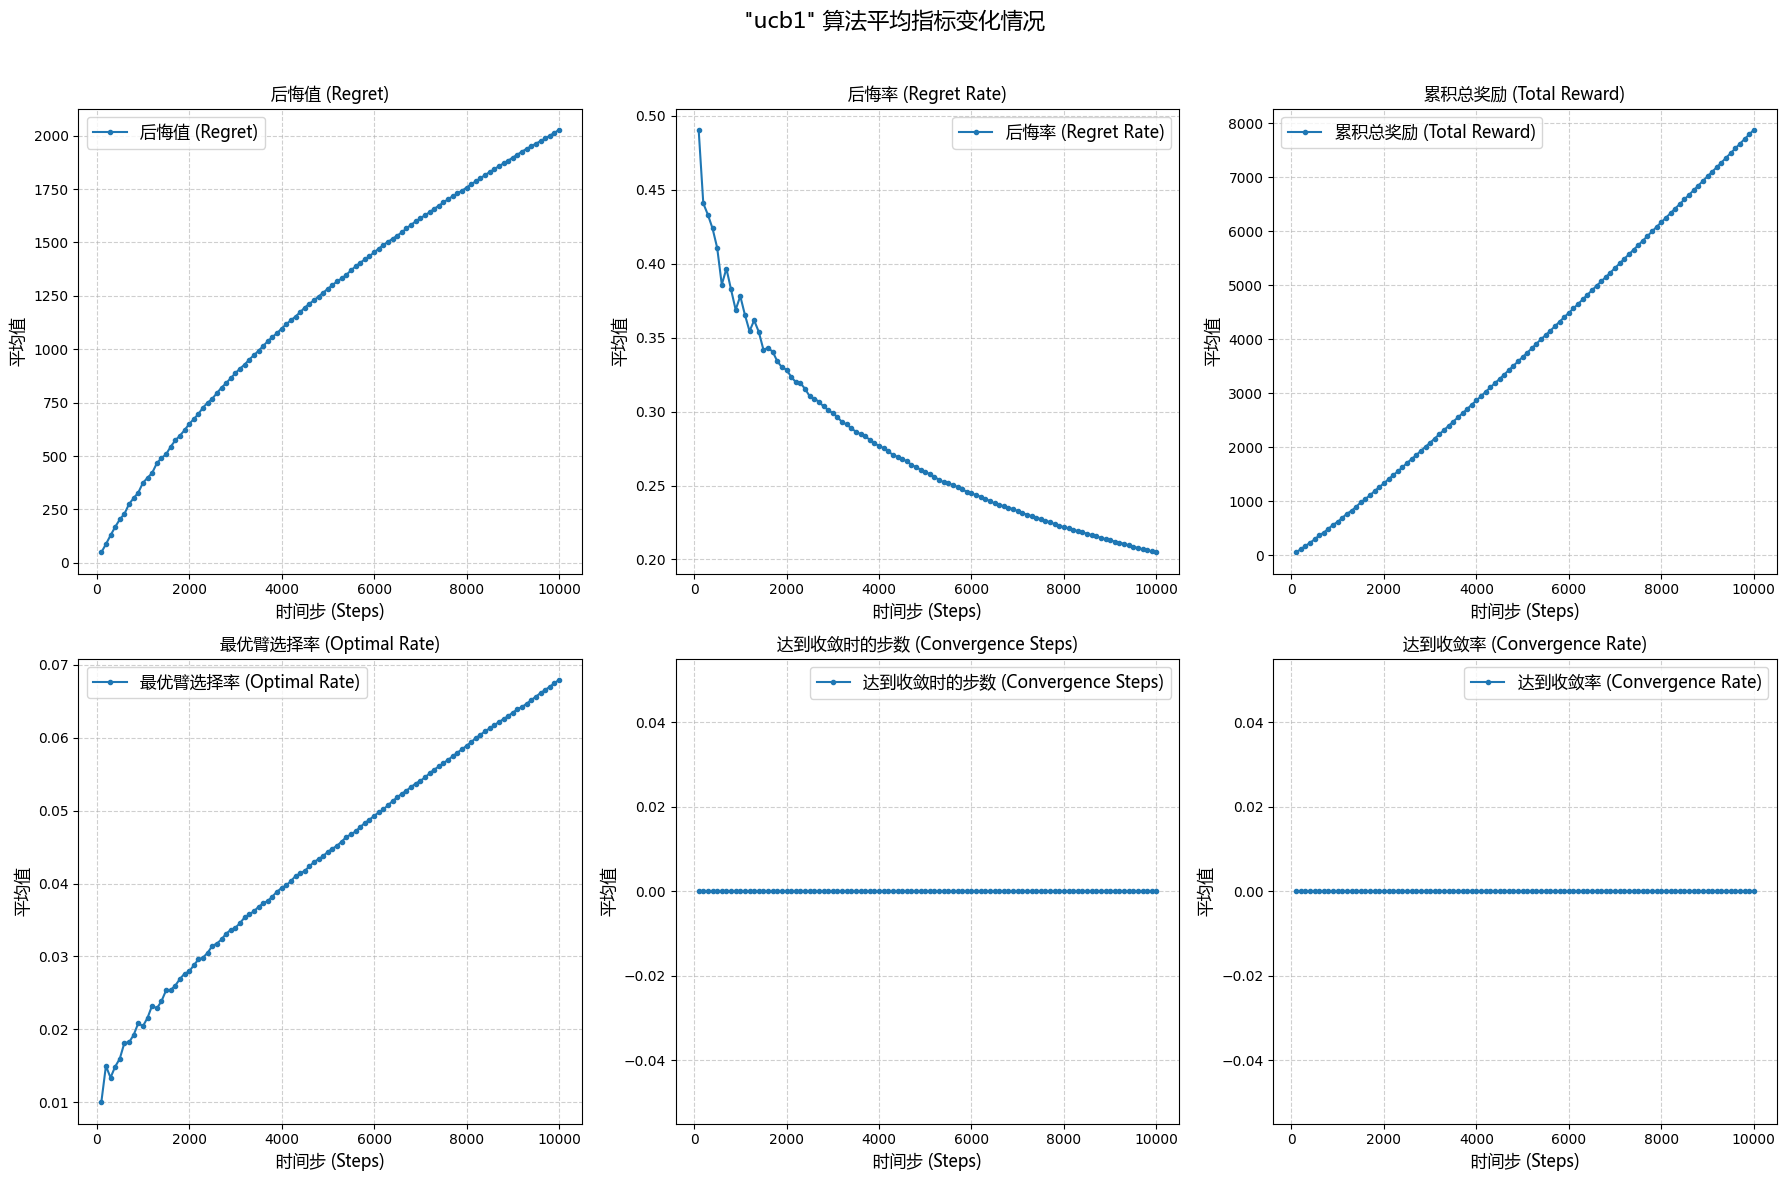

✅ 实验数据已保存至 /home/Jese__Ki/Projects/learn/Python/rl_atomic/bandit/experiment_data/ucb1.png


22551

In [9]:
agents, reward, metrics = batch_train(
    count=COUNT,
    agent_factory=create_ucb1_agent,
    env=ENV,
    steps=STEPS,
    seed=SEED,
    convergence_threshold=CONVERGENCE_THRESHOLD,
    convergence_min_steps=CONVERGENCE_MIN_STEPS,
)
print(metrics)
plot_metrics_history(agents, ucb1.__name__, f"{EXPERIMENT_DATA_DIR}/{ucb1.__name__}.png")

del agents, reward, metrics
gc.collect()